In [47]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16

In [48]:
IMG_HEIGHT, IMG_WIDTH = 224, 224


train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    classes=['affected', 'not affected'],
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=32,
    classes=['affected', 'not affected'],
    class_mode='categorical'
)

Found 47 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.50it/s]


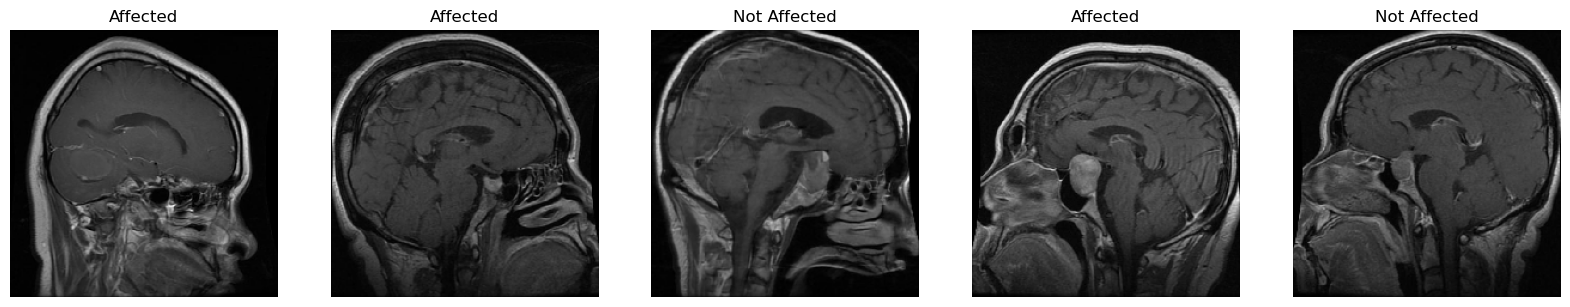

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm


fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i in tqdm(range(0, 5)):
    rand1 = np.random.randint(len(test_generator))
    batch = train_generator[rand1]
    image_batch, label_batch = batch[0], batch[1]
    rand2 = np.random.randint(len(image_batch))
    ax[i].imshow(image_batch[rand2])
    ax[i].axis('off')
    label = label_batch[rand2]
    if label[0] == 1:
        ax[i].set_title('Affected')
    elif label[1] == 1:
        ax[i].set_title('Not Affected')

plt.show()


In [50]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

In [51]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
for layer in base_model.layers:
    layer.trainable = False


In [52]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax') 
])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17926338 (68.38 MB)
Trainable params: 3211650 (12.25 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [57]:
batch_size = 32
try:
    history = model.fit(
    train_generator,    
    epochs=5,
    validation_data=test_generator,
    
    )

    # Save the model
    model.save('model_vgg16.h5')

except Exception as e:
    print("Error during training:", e)


Epoch 1/5
2/2 [==============================] - 42s 31s/step - loss: 8.9482 - accuracy: 0.5106 - val_loss: 2.6874 - val_accuracy: 0.7727
Epoch 2/5
2/2 [==============================] - 40s 31s/step - loss: 2.6620 - accuracy: 0.5745 - val_loss: 2.3192 - val_accuracy: 0.2273
Epoch 3/5
2/2 [==============================] - 40s 21s/step - loss: 1.5781 - accuracy: 0.4255 - val_loss: 0.2824 - val_accuracy: 1.0000
Epoch 4/5
2/2 [==============================] - 40s 31s/step - loss: 0.6542 - accuracy: 0.7021 - val_loss: 0.5167 - val_accuracy: 0.7727
Epoch 5/5
2/2 [==============================] - 39s 31s/step - loss: 0.7265 - accuracy: 0.5745 - val_loss: 0.1762 - val_accuracy: 0.9545


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


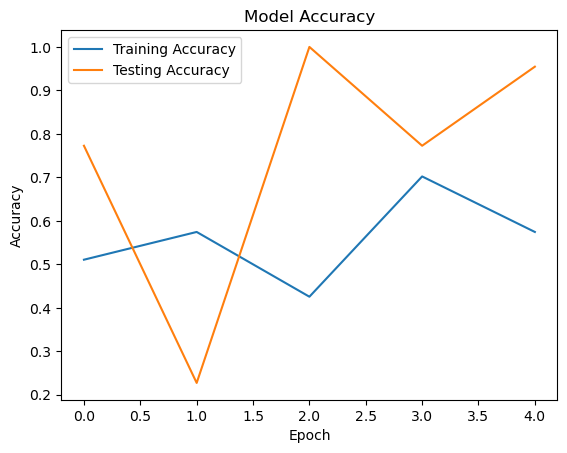

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

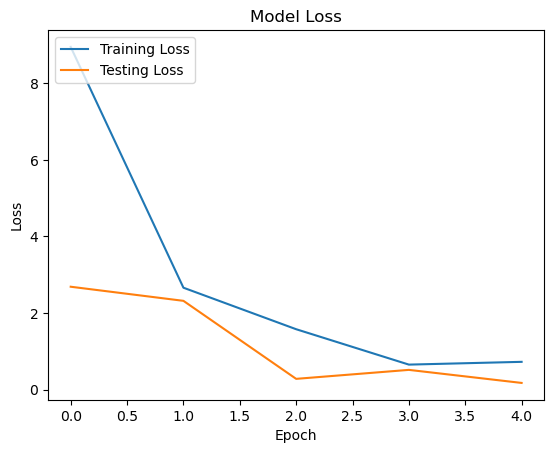

In [59]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [60]:
test_dataset  = test_datagen.flow_from_directory(directory = 'data/test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 22 images belonging to 2 classes.


1/1 [==============================] - 1s 602ms/step
[[0.62703323 0.37296677]]
Prediction: Autism disorder detected
Probability: 0.62703323


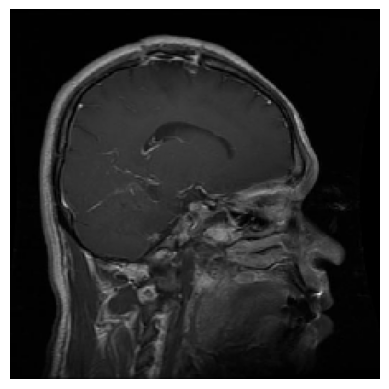

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.io import imshow
from skimage.transform import resize


# Mapping of class indices to class labels
dic = test_dataset.class_indices
idc = {k: v for v, k in dic.items()}

# Load and preprocess image
img_path = r'C:/Users/Admin/Documents/brain tumervgg16/data/test/affected/Tr-gl_0879.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
plt.imshow(img_array)
plt.axis('off')

# Expand dimensions to match model input shape
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
result = model.predict(img_array)
print(result)
# Determine prediction based on result
if result[0][1] > result[0][0]:
    prediction = "Non autism disorder detected"
    probability = result[0][1]
else:
    prediction = "Autism disorder detected"
    probability = result[0][0]

print("Prediction:", prediction)
print("Probability:", probability)


1/1 [==============================] - 1s 615ms/step
[[0.04819327 0.9518068 ]]
Prediction: Non Autism disoder detected
Probability: 0.9518068


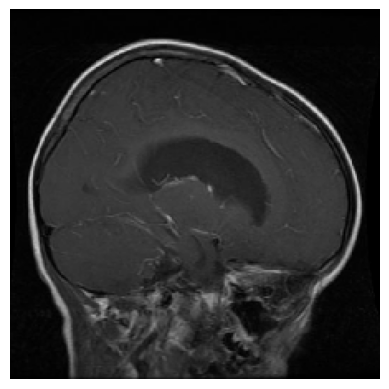

In [72]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from skimage.io import imshow
from skimage.transform import resize

# Assuming model and test_dataset are defined elsewhere in your code

# Mapping of class indices to class labels
dic = test_dataset.class_indices
idc = {k: v for v, k in dic.items()}

# Load and preprocess imageC:\Users\Admin\Documents\brain tumervgg16\data\test\not affected
img_path = r'C:/Users/Admin/Documents/brain tumervgg16/data/test/not affected/Tr-gl_0896.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
plt.imshow(img_array)
plt.axis('off')

# Expand dimensions to match model input shape
img_array = np.expand_dims(img_array, axis=0)

# Predict using the model
result = model.predict(img_array)
print(result)

# Determine prediction based on result
if result[0][1] > result[0][0]:
    prediction = "Non Autism disoder detected"
    probability = result[0][1]
else:
    prediction = "Autism disorder detected"
    probability = result[0][0]

print("Prediction:", prediction)
print("Probability:", probability)
